# Selenium Basic

In [56]:
from selenium import webdriver

driver = webdriver.Chrome(executable_path='../driver/chromedriver.exe')
driver.get("https://pinkwink.kr/")


In [ ]:
#driver.quit() # 브라우저 종료

In [57]:
# 화면 최대 크기 설정

driver.maximize_window() # 브라우저 최대화 / 함수를 의미




In [58]:
# 화면 최소 크기 설정

driver.minimize_window()

In [59]:
# 화면 크기 설정

driver.set_window_size(600, 600)

In [60]:
# 새로 고침
driver.refresh()

In [61]:
# 뒤로 가기
driver.back()

In [62]:
# 앞으로 가기
driver.forward()

In [63]:
# 클릭하기
from selenium.webdriver.common.by import By

first_content = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-masonry > div > ul > li:nth-child(1)')
first_content.click()

In [64]:
# 새로운 탭 생성

driver.execute_script('window.open("https://www.naver.com")')

In [65]:
# 탭 이동

driver.switch_to.window(driver.window_handles[0])


In [66]:
len(driver.window_handles) # 탭 개수 확인

2

In [ ]:
# 탭 닫기

driver.close()

### 2. 화면스크롤

In [67]:
driver.back() 
driver.execute_script('return document.body.scrollHeight') # 스크롤 높이 확인



9617

In [68]:
# 화면 스크롤 하단 이동
# 자바스크립트 코드 실행

driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [70]:
# 현재 보이는 화면 스크린샷 저장

driver.save_screenshot('./last_height.png')


True

In [71]:
# 화면 스크롤 상단 이동

driver.execute_script('window.scrollTo(0,0);')

In [74]:
# 특정 태그 지점까지 스크롤 이동
from selenium.webdriver import ActionChains

some_tag = driver.find_element(By.CSS_SELECTOR, '#content > div:nth-child(6)' ) # 특정 태그 지정
action = ActionChains(driver) # 액션 체인 객체 생성
action.move_to_element(some_tag).perform() # 액션 체인 객체에 특정 태그 지정


In [75]:
driver.quit()

### 3. 검색어 입력
- CSS_SELECTOR


In [76]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [77]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('https://www.naver.com')

In [86]:
keyword = driver.find_element(By.CSS_SELECTOR, '#query')
keyword.send_keys('파이썬')


In [87]:
search_btn = driver.find_element(By.CSS_SELECTOR, '#sform > fieldset > button')
search_btn.click()

- XPATH

In [88]:
driver.find_element(By.XPATH, '//*[@id="query"]').send_keys('xpath')


In [90]:
driver.find_element(By.XPATH, '//*[@id="sform"]/fieldset/button').click()

In [91]:
"""
'//': 최상위
'*': 자손태그
'/' : 자식태그
"""

"\n'//': 최상위\n'*': 자손태그\n'/' : 자식태그\n"

In [92]:
driver.quit()

In [93]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [95]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('https://pinkwink.kr')

In [98]:
# 1. 돋보기 버튼을 선택
from selenium.webdriver import ActionChains # 액션 체인 객체 생성


search_tag = driver.find_element(By.CSS_SELECTOR, '.search') # 특정 태그 지정
action = ActionChains(driver) # 액션 체인 객체 생성
action.click(search_tag) # 액션 체인 객체에 특정 태그 지정
action.perform() # 액션 실행

In [99]:
# 2. 검색어를 입력
driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > input[type=text]').send_keys('딥러닝')


In [100]:
# 3. 검색 버튼 클릭
driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > button').click()

### 4. selenium + beautifulsoup

In [102]:
driver.page_source # 페이지 소스 확인

'<html lang="ko"><head>\n                <script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202312070101/reactive_library_fy2021.js"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202312070101/show_ads_impl_fy2021.js" id="google_shimpl"></script><script src="https://t1.kakaocdn.net/malibu_prod/normal_wpm.js" async=""></script><script type="text/javascript">if (!window.T) { window.T = {} }\nwindow.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":371175,"name":"pinkwink","title":"PinkWink","isDormancy":false,"nickName":"PinkWink","status":"open"},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"https://www.tistory.com/auth/login/?redirectUrl=https://pinkwink.kr/search/%25EB%2594%25A5%25EB%259F%25AC%25EB%258B%259D","DEFAULT_URL":"https://pinkwink.kr","USER":{"name":null,"homepage":null,"id":0,"profileImage":null},"SUBSCRI

In [103]:
from bs4 import BeautifulSoup

req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')


In [105]:
contents = soup.select('.post-item')
len(contents)

8

In [106]:
contents[2]

<div class="post-item">
<a href="/1442">
<span class="thum">
<img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/mqswu/btszojRvW84/iUyoT3foutdwx8x0vWDN7k/img.png"/>
</span>
<span class="title">핑크랩이 2023년 여름. 서울로봇아카데미의 교육을 진행했습니다.</span>
<span class="date">2023. 10. 29. 09:30</span>
<span class="excerpt">올해 2023년도 이제 2개월이 남았네요. 이런 느낌으로 한 해의 끝을 바라보는 것이 벌써 수십년째(헉.ㅠㅠ. 세월...)인데 여전히 한 해에 대한 아쉬움이 남습니다. 그러나 저와 저희 핑크랩(PinkLAB)은 23년을 정말 열심히 살았습니다. 그 중 여름에 진행한 서울로봇아카데미의 한 과정이 기억에 남습니다. 그 과정을 소개하려고 합니다. 핑크랩이 진행한 서울로봇아카데미 과정 서울로봇 아카데미는 서울시가 운영하는 로봇 교육 기관입니다. 서울로봇아카데미는 서울시의 위탁을 받아, 한국로봇산업협회와 한국로봇융합연구원이 서울로봇아카데미를 위탁 운영합니다. 그러니까 서울시가 주최기관이고, 한국로봇산업협회와 한국로봇융합연구원이 주관기관인거죠. 23년 여름에는 위 그림처럼 4개의 과정이 개설되었습니다. 그 중에서 ..</span>
</a>
</div>

In [107]:
driver.quit()

#### 2. 셀프 주유소가 정말 저렴한가요? - 데이터 확보하기 위한 작업

- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

#### 3. 셀레니움으로 접근

In [110]:
from selenium import webdriver

In [148]:
# 페이지 접근
import time

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)

time.sleep(2)

In [114]:
# 팝업창 전환후 닫기

driver.switch_to_window(driver.window_handles[-1]) # 팝업창으로 전환
# driver.close()


C:\Users\kimsh-dt01\AppData\Local\Temp\ipykernel_25580\264032634.py:3: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [115]:
# 접근페이디 다시 요청

driver.switch_to_window(driver.window_handles[0])


C:\Users\kimsh-dt01\AppData\Local\Temp\ipykernel_25580\3374547746.py:3: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[0])


In [117]:
# 새로고침

driver.refresh()

In [119]:
driver.quit()

In [149]:
# 지역 : 시/도

sido_list_raw = driver.find_element(By. ID, 'SIDO_NM0')
sido_list_raw.text


'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [150]:
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option') # option 태그를 모두 찾음 's' 주의해서 붙여주기
sido_list[1].text # 첫번째 요소 확인

'서울'

In [151]:
sido_list[1].get_attribute('value') # value 속성값 가져오기

'서울특별시'

In [152]:
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))
    
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [153]:
sido_names = [option.get_attribute('value') for option in sido_list] # 리스트 컴프리헨션으로 한줄로 작성
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [154]:
# 빈칸 해결
sido_names = sido_names[1:]
sido_names[:5]

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시']

In [155]:
sido_list_raw.send_keys(sido_names[0])

In [156]:
# 구

gu_list_raw = driver.find_element(By. ID, 'SIGUNGU_NM0')
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option') # option 태그를 모두 찾음 's' 주의해서 붙여주기

gu_names = [option.get_attribute('value') for option in gu_list ]
gu_names = gu_names[1:]
gu_names[:5] , len(gu_names) # 25개

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [157]:
gu_list_raw.send_keys(gu_names[0])

In [158]:
# 엑셀저장

driver.find_element(By. ID, 'glopopd_excel').click()

In [160]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID , 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)



C:\Users\kimsh-dt01\AppData\Local\Temp\ipykernel_25580\447756592.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [142]:
driver.close()

### 4. 데이터 정리하기 


In [162]:
import pandas as pd
from glob import glob

In [163]:
# 파일 목록 한 번에 가져오기

glob('../data/지역_*.xls') # 지역_로 시작하는 모든 파일 가져오기

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [166]:
stations_files =glob('../data/지역_*.xls')
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [170]:
# 하나만 일겅보기

tmp = pd.read_excel(stations_files[0], header=2) # header=2 : 2번째 행부터 읽어오기
tmp.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
9,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,1921,1721,1649,-
10,서울특별시,(주)소모 성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1728,1628,-
11,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,1954,1754,1654,-
12,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),HD현대오일뱅크,02-484-9323,N,-,1899,1799,-
13,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1978,1898,1800


In [174]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [179]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1589,1529,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1634,1545,-
2,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1665,1575,1500
3,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1886,1666,1588,1590
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1875,1675,1595,1599
...,...,...,...,...,...,...,...,...,...,...
27,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,02-445-5500,N,2489,2195,2086,1846
28,서울특별시,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,HD현대오일뱅크,02-543-1154,N,2397,2198,2098,1798
29,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2630,2395,2295,1798
30,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,HD현대오일뱅크,02-518-5631,N,2710,2490,2380,-


In [180]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      438 non-null    object
 1   상호      438 non-null    object
 2   주소      438 non-null    object
 3   상표      438 non-null    object
 4   전화번호    438 non-null    object
 5   셀프여부    438 non-null    object
 6   고급휘발유   438 non-null    object
 7   휘발유     438 non-null    object
 8   경유      438 non-null    object
 9   실내등유    438 non-null    object
dtypes: object(10)
memory usage: 37.6+ KB


In [181]:
stations = pd.DataFrame({
    "상호":stations_raw["상호"],
    "주소":stations_raw["주소"],
    "가격":stations_raw["휘발유"],
    "셀프":stations_raw["셀프여부"],
    "상표":stations_raw["상표"]
})

In [182]:
stations.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634,N,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1666,Y,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1675,Y,GS칼텍스


In [183]:
stations['주소']

0     서울특별시 강동구  천호대로 1246 (둔촌제2동)
1            서울 강동구 구천면로 357 (암사동)
2             서울 강동구 동남로 811 (명일동)
3           서울 강동구 양재대로 1323 (성내동)
4              서울 강동구 고덕로 39 (암사동)
                  ...             
27            서울 강남구 개포로 654 (일원동)
28                 서울 강남구 압구정로 154
29            서울 강남구 논현로 747 (논현동)
30                  서울 강남구 언주로 716
31           서울 강남구 봉은사로 433 (삼성동)
Name: 주소, Length: 438, dtype: object

In [184]:
for eachAdress in stations['주소']:
    print(eachAdress.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용산구


In [186]:
stations['구'] = [eachAdress.split()[1] for eachAdress in stations['주소']]

In [187]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1666,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1675,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
27,대청주유소,서울 강남구 개포로 654 (일원동),2195,N,SK에너지,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2198,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2395,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490,N,HD현대오일뱅크,강남구


In [189]:
stations['구'].unique() , len(stations['구'].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [190]:
# 가격 데이터형 변환 object -> float
# 가격 정보가 있는 주유소만 사용

stations = stations[stations['가격'] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
27,대청주유소,서울 강남구 개포로 654 (일원동),2195,N,SK에너지,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2198,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2395,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490,N,HD현대오일뱅크,강남구
31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [191]:
stations['가격'] = stations['가격'].astype(float)

C:\Users\kimsh-dt01\AppData\Local\Temp\ipykernel_25580\259116232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = stations['가격'].astype(float)


In [192]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      437 non-null    object 
 1   주소      437 non-null    object 
 2   가격      437 non-null    float64
 3   셀프      437 non-null    object 
 4   상표      437 non-null    object 
 5   구       437 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.9+ KB


In [193]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634.0,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665.0,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1666.0,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1675.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
27,대청주유소,서울 강남구 개포로 654 (일원동),2195.0,N,SK에너지,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2198.0,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구


In [194]:
# 인덱스 재정렬

stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
432,27,대청주유소,서울 강남구 개포로 654 (일원동),2195.0,N,SK에너지,강남구
433,28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2198.0,N,HD현대오일뱅크,강남구
434,29,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
435,30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구
436,31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구


In [195]:
del stations['index']
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634.0,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665.0,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1666.0,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1675.0,Y,GS칼텍스,강동구


#### 5. 주유 가격 정보 시각화

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')
# %matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == 'Darwin':
    rc("font", family="Arial Unicode MS")
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system")

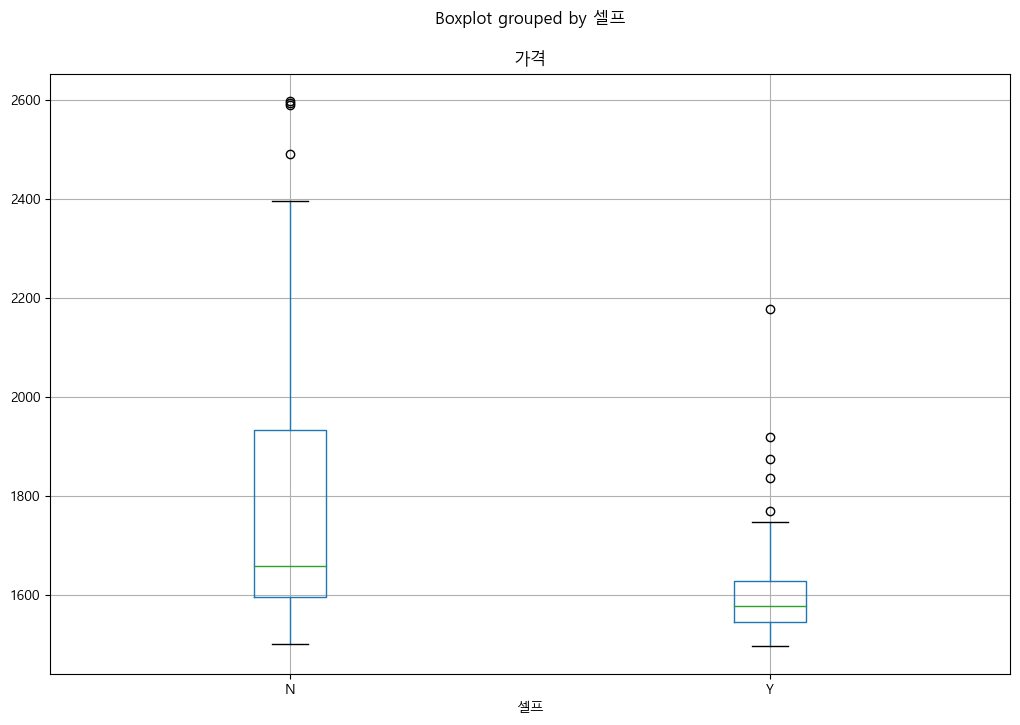

In [215]:
# boxplot(feat. pandas)

stations.boxplot(column='가격', by='셀프', figsize=(12,8));


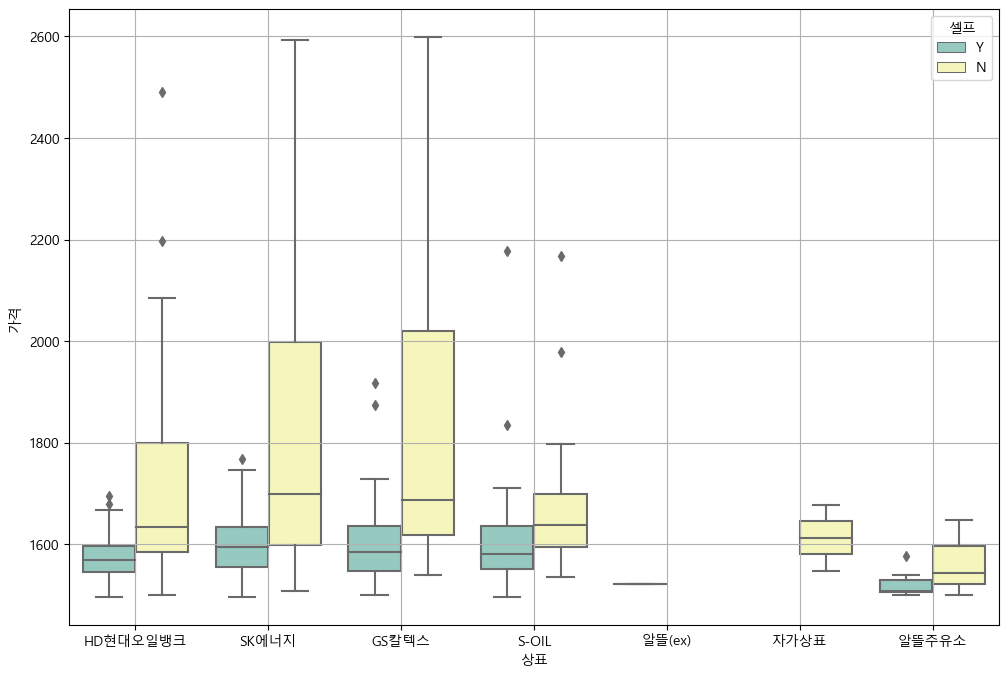

In [222]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.grid()
plt.show()

In [223]:
# 지도 시각화

import json
import folium
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [224]:
# 가장 비싼 주유소 10개

stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
436,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
272,서남주유소,서울 중구 통일로 30,2593.0,N,SK에너지,중구
238,서계주유소,서울 용산구 청파로 367 (청파동),2589.0,N,GS칼텍스,용산구
435,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구
434,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
271,필동주유소,서울 중구 퇴계로 196 (필동2가),2379.0,N,GS칼텍스,중구
214,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
262,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2290.0,N,GS칼텍스,종로구
261,경복궁주유소,서울 종로구 율곡로 6 (중학동),2280.0,N,GS칼텍스,종로구
260,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2267.0,N,SK에너지,종로구


In [225]:
# 가장 값싼 주유소 10개

stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
347,서서울고속주유소,서울 구로구 경인로 150 (오류동),1495.0,Y,SK에너지,구로구
346,(주)서울에너지 궁동주유소,서울 구로구 오리로 1299 (궁동),1495.0,Y,HD현대오일뱅크,구로구
345,㈜자연에너지 고척주유소,서울 구로구 고척로 199 (고척동),1495.0,Y,HD현대오일뱅크,구로구
348,씨앤에스유통(주) 구로드림주유소,서울 구로구 경인로 41 (온수동),1495.0,Y,S-OIL,구로구
188,성락주유소,서울 영등포구 가마산로 414 (신길동),1499.0,Y,S-OIL,영등포구
189,도림주유소,서울 영등포구 도림로 343 (도림동),1499.0,Y,알뜰주유소,영등포구
197,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499.0,Y,GS칼텍스,영등포구
196,(주)MS에너지,서울 영등포구 대림로 230,1499.0,N,HD현대오일뱅크,영등포구
349,(주)한미석유구로그린주유소,서울 구로구 구로중앙로 76 (구로동),1499.0,Y,GS칼텍스,구로구
192,영등포현대셀프주유소,서울 영등포구 경인로 822 (영등포동),1499.0,Y,HD현대오일뱅크,영등포구


In [227]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1873.156250
강동구,1719.928571
강북구,1551.583333
강서구,1613.818182
관악구,1627.846154


In [238]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)
my_map.choropleth( # 지도에 색상 표시
    geo_data = geo_str, # json 파일
    data = gu_data, # 데이터프레임
    columns = [gu_data.index, '가격'], # 컬럼명
    key_on = 'feature.id', # json 파일의 id
    fill_color = 'PuRd' # 색상
)
my_map